In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [31]:
X_test.shape

(10000, 32, 32, 3)

In [32]:
X_train.shape

(50000, 32, 32, 3)

In [33]:
y_train.shape

(50000, 1)

In [34]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [35]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [36]:
classses=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [37]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classses[y[index]])

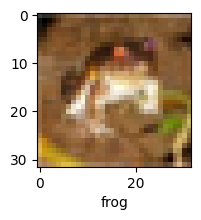

In [38]:
plot_sample(X_train,y_train,0)

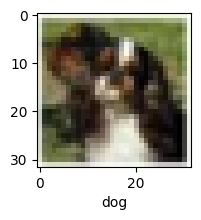

In [39]:
plot_sample(X_train,y_train,500)

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0
#normalization


In [9]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.1018 - loss: nan
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.0995 - loss: nan
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 78ms/step - accuracy: 0.0994 - loss: nan
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.1009 - loss: nan
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.0998 - loss: nan
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.1007 - loss: nan
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 77ms/step - accuracy: 0.0982 - loss: nan
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - accuracy: 0.0997 - loss: nan
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.1019 - loss: nan
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.0999 - loss: nan


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

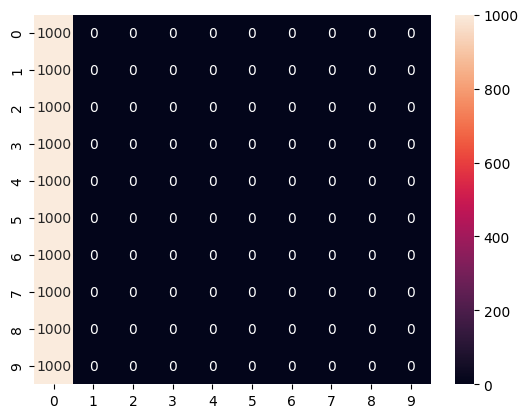

In [12]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True,fmt='d')

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<function matplotlib.pyplot.show(close=None, block=None)>

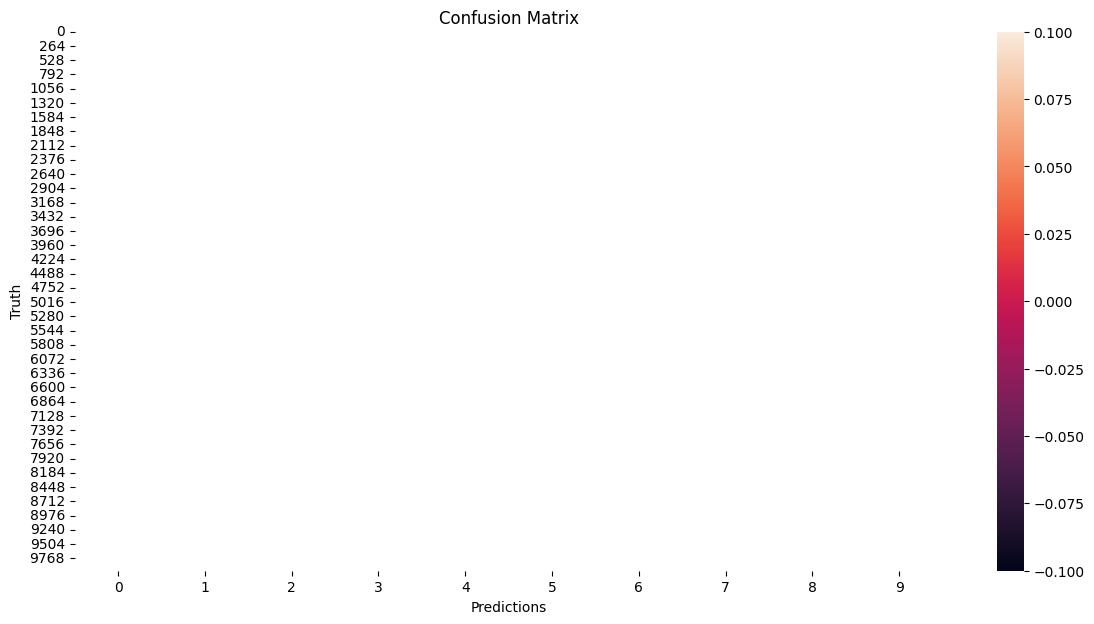

In [14]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred,annot=True)
plt.ylabel('Truth')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from threading import main_thread
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3734 - loss: 1.7091
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.5954 - loss: 1.1514
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6526 - loss: 0.9958
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6807 - loss: 0.9217
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7020 - loss: 0.8548
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7239 - loss: 0.7927
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7467 - loss: 0.7361
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7597 - loss: 0.6960
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7714 - loss: 0.6560
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.7850 - loss: 0.6127


In [19]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6908 - loss: 0.9389


[0.9418013691902161, 0.6909000277519226]

In [21]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


array([[6.2850182e-04, 1.4190952e-05, 7.0926180e-04, 6.3675910e-01,
        5.5535408e-03, 2.9020011e-01, 1.6937310e-02, 4.4407460e-04,
        4.8654266e-02, 9.9600882e-05],
       [6.9269724e-03, 2.5604123e-02, 1.0048875e-04, 2.6701196e-05,
        3.6522076e-07, 6.6500732e-08, 9.2247251e-07, 4.0309815e-06,
        9.6644348e-01, 8.9270872e-04],
       [5.1750425e-02, 1.4089337e-01, 1.6947124e-04, 7.7118715e-03,
        5.1312163e-03, 2.9561426e-03, 2.5945163e-04, 2.8523398e-03,
        7.5589830e-01, 3.2377411e-02],
       [7.6757932e-01, 2.2108180e-03, 6.1907140e-03, 1.3560873e-03,
        5.3798039e-03, 2.4370214e-05, 1.3698301e-03, 2.1959124e-04,
        2.1552333e-01, 1.4603288e-04],
       [1.4567286e-07, 7.2469072e-07, 1.6013598e-03, 8.4549459e-03,
        6.2779778e-01, 2.2469603e-03, 3.5988358e-01, 9.4454327e-07,
        1.2999236e-05, 4.6017954e-07]], dtype=float32)

In [22]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [24]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

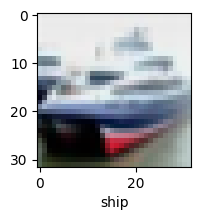

In [40]:
plot_sample(X_test,y_test,1)

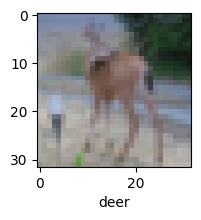

In [42]:
plot_sample(X_test,y_test,100)

In [48]:
classses[y_test[100]]


'deer'

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import requests
from io import BytesIO
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def predict_new_image(model, img_source, from_drive=False):
    try:
        if from_drive and "drive.google.com" in img_source:
            import re
            match = re.search(r'/d/([a-zA-Z0-9_-]+)/', img_source)
            if not match:
                raise ValueError("Invalid Google Drive link format.")
            file_id = match.group(1)
            img_url = f"https://drive.google.com/uc?export=download&id={file_id}"
            response = requests.get(img_url)
            response.raise_for_status()
            img = image.load_img(BytesIO(response.content), target_size=(32, 32))
        elif img_source.startswith("http"):
            response = requests.get(img_source)
            response.raise_for_status()
            img = image.load_img(BytesIO(response.content), target_size=(32, 32))
        else:
            img = image.load_img(img_source, target_size=(32, 32))

        # preprocess
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # predict
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)

        # show image
        plt.imshow(image.array_to_img(img_array[0]))
        plt.axis("off")
        plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
        plt.show()

        print(f"Predicted class: {class_names[predicted_class]} (confidence: {confidence:.2f})")

    except Exception as e:
        print("Error:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


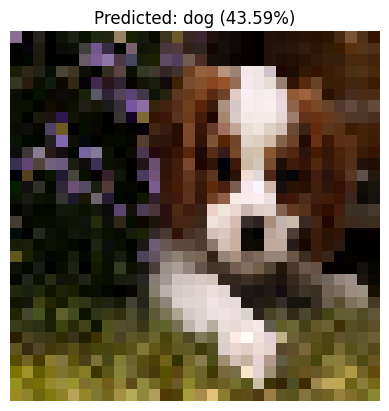

Predicted class: dog (confidence: 0.44)


In [63]:
model = cnn
predict_new_image(model,
    "https://drive.google.com/file/d/1TBGqOvR4HICMJccV5QvpVqO6B8satAnx/view?usp=sharing",
    from_drive=True)
